In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-appetency/sample_submission.csv
/kaggle/input/netflix-appetency/train.csv
/kaggle/input/netflix-appetency/test.csv


In [2]:
#importing the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn
from sklearn.feature_selection import VarianceThreshold

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 600)

In [3]:
#read the data
traindf = pd.read_csv('/kaggle/input/netflix-appetency/train.csv')
testdf = pd.read_csv('/kaggle/input/netflix-appetency/test.csv')
traindf.shape, testdf.shape

((70000, 509), (30000, 508))

So, we have **70000** records in train data with **509** columns & we have **30000** in test data with **508** columns

In [4]:
#function defination


In [5]:
traindf.head()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature

In [6]:
testdf.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,fe

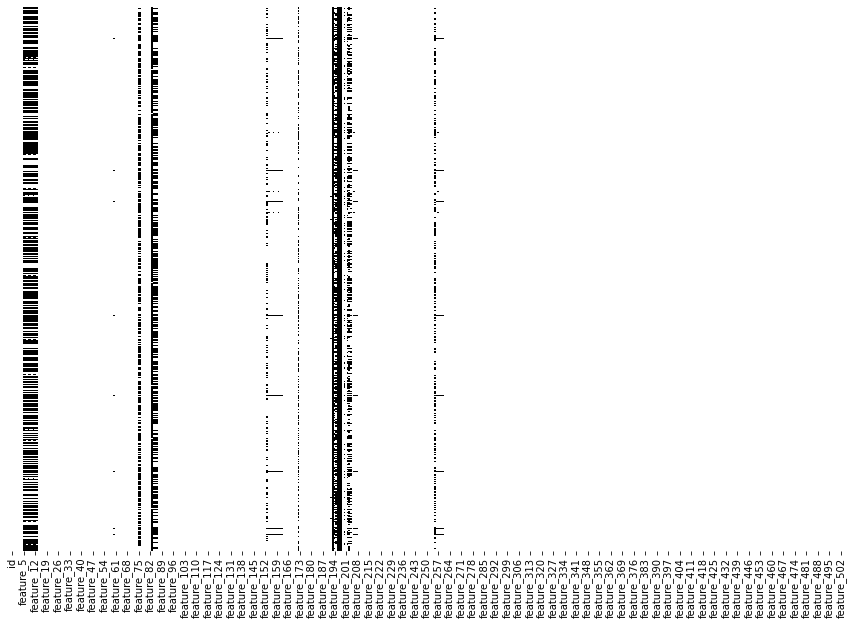

In [7]:
#heatmap for missing values in train dataset, this might take a while to execute., since we have 509 columns
plt.figure(figsize=(15,10))
sns.heatmap(traindf.isnull(), yticklabels=False, cbar=False, cmap=plt.cm.CMRmap_r)
plt.show()

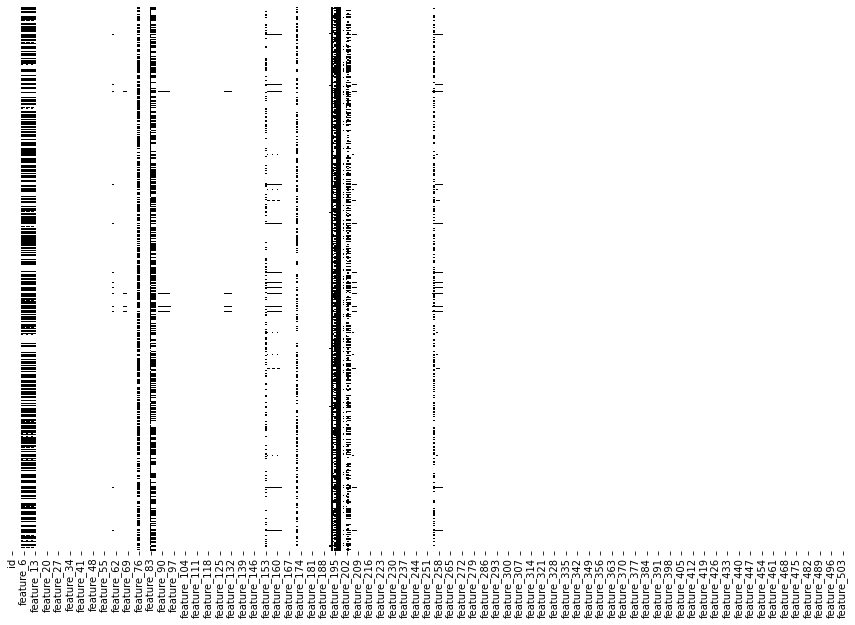

In [8]:
#heatmap for missing values in test dataset, this might take a while to execute., since we have 509 columns
plt.figure(figsize=(15,10))
sns.heatmap(testdf.isnull(), yticklabels=False, cbar=False, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
#missing Value percentage in traindf
train_missing_col = []
for i in traindf.columns:
    if (traindf[i].isnull().sum())>0:
        print('{}:{}'.format(i,(100*traindf[i].isnull().sum()/len(traindf.index))))
        train_missing_col.append(i)

feature_5:63.68
feature_6:62.30142857142857
feature_7:60.29714285714286
feature_8:63.68
feature_9:62.30142857142857
feature_10:60.29714285714286
feature_11:63.68
feature_12:62.30142857142857
feature_13:60.29714285714286
feature_35:0.12142857142857143
feature_36:0.12142857142857143
feature_37:0.12142857142857143
feature_38:0.12142857142857143
feature_39:0.12142857142857143
feature_40:0.12142857142857143
feature_60:2.0742857142857143
feature_67:0.5871428571428572
feature_68:0.5871428571428572
feature_75:70.29714285714286
feature_76:70.29714285714286
feature_81:0.22714285714285715
feature_83:98.32
feature_84:59.5
feature_85:59.5
feature_86:59.5
feature_88:0.5871428571428572
feature_89:0.5457142857142857
feature_90:0.5871428571428572
feature_91:0.5871428571428572
feature_92:0.5871428571428572
feature_93:0.5457142857142857
feature_94:0.5871428571428572
feature_95:0.14
feature_96:0.12142857142857143
feature_128:0.5871428571428572
feature_129:0.5871428571428572
feature_130:0.5871428571428572


In [10]:
#missing Value percentage in testdf
test_missing_col = []
for i in testdf.columns:
    if (traindf[i].isnull().sum())>0:
        print('{}:{}'.format(i,(100*testdf[i].isnull().sum()/len(testdf.index))))
        test_missing_col.append(i)

feature_5:63.95
feature_6:62.35
feature_7:60.42
feature_8:63.95
feature_9:62.35
feature_10:60.42
feature_11:63.95
feature_12:62.35
feature_13:60.42
feature_35:0.11
feature_36:0.11
feature_37:0.11
feature_38:0.11
feature_39:0.11
feature_40:0.11
feature_60:2.02
feature_67:0.63
feature_68:0.63
feature_75:70.34
feature_76:70.34
feature_81:0.2633333333333333
feature_83:98.29
feature_84:59.583333333333336
feature_85:59.583333333333336
feature_86:59.583333333333336
feature_88:0.63
feature_89:0.5666666666666667
feature_90:0.63
feature_91:0.63
feature_92:0.63
feature_93:0.5666666666666667
feature_94:0.63
feature_95:0.15
feature_96:0.11
feature_128:0.63
feature_129:0.63
feature_130:0.63
feature_131:0.5666666666666667
feature_132:0.5666666666666667
feature_153:30.233333333333334
feature_154:2.74
feature_155:2.256666666666667
feature_156:2.02
feature_157:2.74
feature_158:2.256666666666667
feature_159:2.02
feature_160:2.74
feature_161:2.256666666666667
feature_162:2.02
feature_172:50.95666666666666

Taking a decision of dropping columns which have nulls > 40%

In [11]:
#checking the columns which have nulls >40 in train data
train_greater_40 = []
for i in traindf.columns:
    if ((100*traindf[i].isnull().sum()/len(traindf.index)))>40:
        print('{}:{}'.format(i,(100*traindf[i].isnull().sum()/len(traindf.index))))
        train_greater_40.append(i)

feature_5:63.68
feature_6:62.30142857142857
feature_7:60.29714285714286
feature_8:63.68
feature_9:62.30142857142857
feature_10:60.29714285714286
feature_11:63.68
feature_12:62.30142857142857
feature_13:60.29714285714286
feature_75:70.29714285714286
feature_76:70.29714285714286
feature_83:98.32
feature_84:59.5
feature_85:59.5
feature_86:59.5
feature_172:51.13
feature_193:100.0
feature_194:43.80571428571429
feature_195:63.89
feature_196:100.0
feature_197:100.0
feature_198:100.0
feature_202:48.00857142857143
feature_203:57.33428571428571
feature_255:48.03142857142857


In [12]:
#checking the len of list which has columns with nulls > 40
len(train_greater_40)

25

we have 25 columns which hae nulls greater than 40, dropping the same from train & test

In [13]:
traindf.drop(train_greater_40, inplace=True, axis=1)
testdf.drop(train_greater_40, inplace=True, axis=1)
traindf.shape, testdf.shape

((70000, 484), (30000, 483))

In [14]:
#checking if the list for traindf empty cols is same as testdf empty cols
if test_missing_col.sort() == train_missing_col.sort():
    print('Equal')
else:
    print('Not Equal')

Equal


Found that the lists are equal

### Missing Imputation

In [15]:
#Imputing the traindf
traindf['feature_96'].fillna(traindf['feature_96'].median(), inplace=True)
traindf['feature_95'].fillna(traindf['feature_95'].median(),inplace=True)
traindf['feature_94'].fillna(traindf['feature_94'].median(),inplace=True)
traindf['feature_93'].fillna(traindf['feature_93'].median(),inplace=True)
traindf['feature_92'].fillna(traindf['feature_92'].median(),inplace=True)
traindf['feature_91'].fillna(traindf['feature_91'].median(),inplace=True)
traindf['feature_90'].fillna(traindf['feature_90'].median(),inplace=True)
traindf['feature_89'].fillna(traindf['feature_89'].median(),inplace=True)
traindf['feature_88'].fillna(traindf['feature_88'].median(),inplace=True)
traindf['feature_81'].fillna(traindf['feature_81'].median(),inplace=True)
traindf['feature_68'].fillna(traindf['feature_68'].median(),inplace=True)
traindf['feature_67'].fillna(traindf['feature_67'].median(),inplace=True)
traindf['feature_60'].fillna(traindf['feature_60'].median(),inplace=True)
traindf['feature_40'].fillna(traindf['feature_40'].median(),inplace=True)
traindf['feature_39'].fillna(traindf['feature_39'].median(),inplace=True)
traindf['feature_38'].fillna(traindf['feature_38'].median(),inplace=True)
traindf['feature_37'].fillna(traindf['feature_37'].median(),inplace=True)
traindf['feature_36'].fillna(traindf['feature_36'].median(),inplace=True)
traindf['feature_35'].fillna(traindf['feature_35'].median(),inplace=True)
traindf['feature_260'].fillna(traindf['feature_260'].median(),inplace=True)
traindf['feature_259'].fillna(traindf['feature_259'].median(),inplace=True)
traindf['feature_258'].fillna(traindf['feature_258'].median(),inplace=True)
traindf['feature_257'].fillna(traindf['feature_257'].median(),inplace=True)
traindf['feature_256'].fillna(traindf['feature_256'].median(),inplace=True)
traindf['feature_254'].fillna(traindf['feature_254'].median(),inplace=True)
traindf['feature_208'].fillna(traindf['feature_208'].median(),inplace=True)
traindf['feature_207'].fillna(traindf['feature_207'].median(),inplace=True)
traindf['feature_206'].fillna(traindf['feature_206'].median(),inplace=True)
traindf['feature_162'].fillna(traindf['feature_162'].median(),inplace=True)
traindf['feature_161'].fillna(traindf['feature_161'].median(),inplace=True)
traindf['feature_160'].fillna(traindf['feature_160'].median(),inplace=True)
traindf['feature_159'].fillna(traindf['feature_159'].median(),inplace=True)
traindf['feature_158'].fillna(traindf['feature_158'].median(),inplace=True)
traindf['feature_157'].fillna(traindf['feature_157'].median(),inplace=True)
traindf['feature_156'].fillna(traindf['feature_156'].median(),inplace=True)
traindf['feature_155'].fillna(traindf['feature_155'].median(),inplace=True)
traindf['feature_154'].fillna(traindf['feature_154'].median(),inplace=True)
traindf['feature_153'].fillna(traindf['feature_153'].median(),inplace=True)
traindf['feature_132'].fillna(traindf['feature_132'].median(),inplace=True)
traindf['feature_131'].fillna(traindf['feature_131'].median(),inplace=True)
traindf['feature_130'].fillna(traindf['feature_130'].median(),inplace=True)
traindf['feature_129'].fillna(traindf['feature_129'].median(),inplace=True)
traindf['feature_128'].fillna(traindf['feature_128'].median(),inplace=True)
# traindf['feature_191'].fillna(traindf['feature_191'].median(),inplace=True)
# traindf['feature_192'].fillna(traindf['feature_192'].median(),inplace=True)
# traindf['feature_200'].fillna(traindf['feature_200'].median(),inplace=True)
# traindf['feature_201'].fillna(traindf['feature_201'].median(),inplace=True)
# traindf['feature_204'].fillna(traindf['feature_204'].median(),inplace=True)
traindf.isnull().sum()

id             0
target         0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_502    0
feature_503    0
feature_504    0
feature_505    0
feature_506    0
Length: 484, dtype: int64

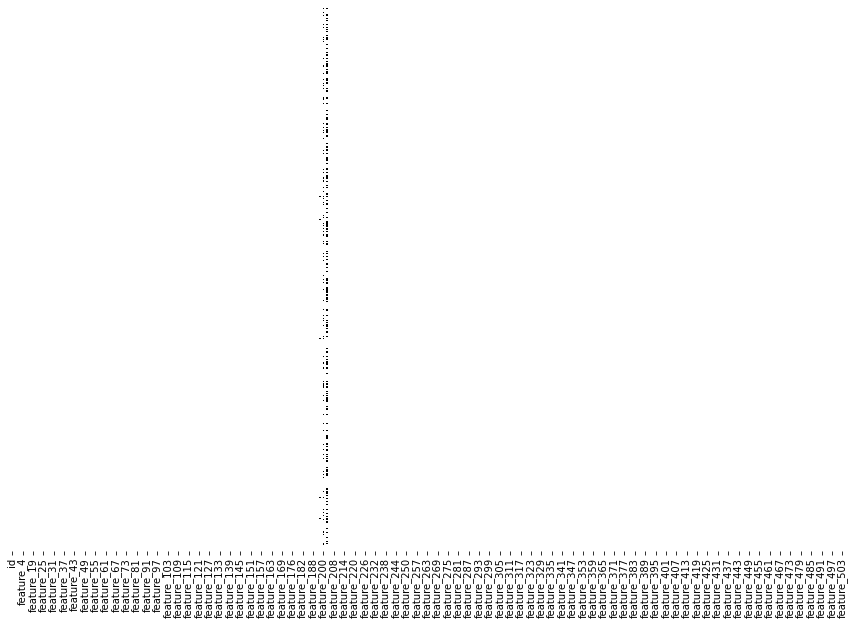

In [16]:
#heatmap for missing values in train dataset, this might take a while to execute., since we have 509 columns
plt.figure(figsize=(15,10))
sns.heatmap(traindf.isnull(), yticklabels=False, cbar=False, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:
#imputing the testdf
testdf['feature_96'].fillna(testdf['feature_96'].median(),inplace=True)
testdf['feature_95'].fillna(testdf['feature_95'].median(),inplace=True)
testdf['feature_94'].fillna(testdf['feature_94'].median(),inplace=True)
testdf['feature_93'].fillna(testdf['feature_93'].median(),inplace=True)
testdf['feature_92'].fillna(testdf['feature_92'].median(),inplace=True)
testdf['feature_91'].fillna(testdf['feature_91'].median(),inplace=True)
testdf['feature_90'].fillna(testdf['feature_90'].median(),inplace=True)
testdf['feature_89'].fillna(testdf['feature_89'].median(),inplace=True)
testdf['feature_88'].fillna(testdf['feature_88'].median(),inplace=True)
testdf['feature_81'].fillna(testdf['feature_81'].median(),inplace=True)
testdf['feature_68'].fillna(testdf['feature_68'].median(),inplace=True)
testdf['feature_67'].fillna(testdf['feature_67'].median(),inplace=True)
testdf['feature_60'].fillna(testdf['feature_60'].median(),inplace=True)
testdf['feature_40'].fillna(testdf['feature_40'].median(),inplace=True)
testdf['feature_39'].fillna(testdf['feature_39'].median(),inplace=True)
testdf['feature_38'].fillna(testdf['feature_38'].median(),inplace=True)
testdf['feature_37'].fillna(testdf['feature_37'].median(),inplace=True)
testdf['feature_36'].fillna(testdf['feature_36'].median(),inplace=True)
testdf['feature_35'].fillna(testdf['feature_35'].median(),inplace=True)
testdf['feature_260'].fillna(testdf['feature_260'].median(),inplace=True)
testdf['feature_259'].fillna(testdf['feature_259'].median(),inplace=True)
testdf['feature_258'].fillna(testdf['feature_258'].median(),inplace=True)
testdf['feature_257'].fillna(testdf['feature_257'].median(),inplace=True)
testdf['feature_256'].fillna(testdf['feature_256'].median(),inplace=True)
testdf['feature_254'].fillna(testdf['feature_254'].median(),inplace=True)
testdf['feature_208'].fillna(testdf['feature_208'].median(),inplace=True)
testdf['feature_207'].fillna(testdf['feature_207'].median(),inplace=True)
testdf['feature_206'].fillna(testdf['feature_206'].median(),inplace=True)
testdf['feature_162'].fillna(testdf['feature_162'].median(),inplace=True)
testdf['feature_161'].fillna(testdf['feature_161'].median(),inplace=True)
testdf['feature_160'].fillna(testdf['feature_160'].median(),inplace=True)
testdf['feature_159'].fillna(testdf['feature_159'].median(),inplace=True)
testdf['feature_158'].fillna(testdf['feature_158'].median(),inplace=True)
testdf['feature_157'].fillna(testdf['feature_157'].median(),inplace=True)
testdf['feature_156'].fillna(testdf['feature_156'].median(),inplace=True)
testdf['feature_155'].fillna(testdf['feature_155'].median(),inplace=True)
testdf['feature_154'].fillna(testdf['feature_154'].median(),inplace=True)
testdf['feature_153'].fillna(testdf['feature_153'].median(),inplace=True)
testdf['feature_132'].fillna(testdf['feature_132'].median(),inplace=True)
testdf['feature_131'].fillna(testdf['feature_131'].median(),inplace=True)
testdf['feature_130'].fillna(testdf['feature_130'].median(),inplace=True)
testdf['feature_129'].fillna(testdf['feature_129'].median(),inplace=True)
testdf['feature_128'].fillna(testdf['feature_128'].median(),inplace=True)
# testdf['feature_191'].fillna(testdf['feature_191'].median(),inplace=True)
# testdf['feature_192'].fillna(testdf['feature_192'].median(),inplace=True)
# testdf['feature_200'].fillna(testdf['feature_200'].median(),inplace=True)
# testdf['feature_201'].fillna(testdf['feature_201'].median(),inplace=True)
# testdf['feature_204'].fillna(testdf['feature_204'].median(),inplace=True)
testdf.isnull().sum()

id             0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
              ..
feature_502    0
feature_503    0
feature_504    0
feature_505    0
feature_506    0
Length: 483, dtype: int64

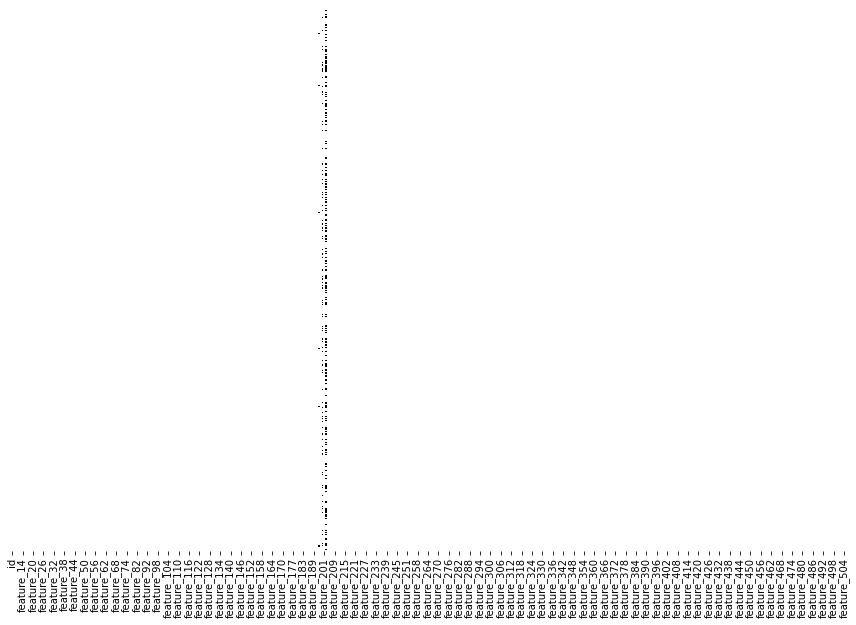

In [18]:
#heatmap for missing values in test dataset, this might take a while to execute., since we have 509 columns
plt.figure(figsize=(15,10))
sns.heatmap(testdf.isnull(), yticklabels=False, cbar=False, cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
for i in traindf.columns:
    if (traindf[i].isnull().sum())>0:
        print('{}:{}'.format(i,(100*traindf[i].isnull().sum()/len(traindf.index))))
        #train_missing_col.append(i)

feature_191:0.22714285714285715
feature_192:0.9542857142857143
feature_200:18.451428571428572
feature_201:0.17714285714285713
feature_204:39.34571428571429


In [20]:
for i in testdf.columns:
    if (testdf[i].isnull().sum())>0:
        print('{}:{}'.format(i,(100*testdf[i].isnull().sum()/len(testdf.index))))
        #train_missing_col.append(i)

feature_191:0.2633333333333333
feature_192:0.9466666666666667
feature_200:18.546666666666667
feature_201:0.19333333333333333
feature_204:39.36666666666667


In [21]:
traindf['feature_191'].value_counts()

22/01/2018    86
23/01/2018    82
16/01/2018    81
15/01/2018    77
24/01/2018    77
              ..
25/12/2011     1
29/10/1997     1
06/08/2000     1
12/05/1997     1
10/06/2002     1
Name: feature_191, Length: 6730, dtype: int64

In [22]:
traindf['feature_192'].value_counts()

15/01/2018    127
16/01/2018    106
23/01/2018    106
22/01/2018    102
24/01/2018     96
             ... 
14/07/2015      1
12/12/2009      1
10/04/2010      1
09/07/2009      1
25/04/2011      1
Name: feature_192, Length: 2920, dtype: int64

In [23]:
traindf['feature_200'].value_counts()

17/01/2016    255
26/06/2016    232
16/01/2016    189
10/07/2016    189
14/07/2016    187
             ... 
20/07/2005      1
27/04/2011      1
27/08/2010      1
08/06/2005      1
16/01/2012      1
Name: feature_200, Length: 3128, dtype: int64

In [24]:
traindf['feature_201'].value_counts()

01/01/1970    449
15/01/2018    140
22/01/2018    136
16/01/2018    136
23/01/2018    135
             ... 
22/01/2017      1
10/04/2016      1
18/08/2008      1
06/07/2007      1
17/07/2010      1
Name: feature_201, Length: 3264, dtype: int64

In [25]:
traindf['feature_204'].value_counts()

26/10/2008    186
01/10/2011    182
01/09/2011    171
01/07/2011    162
01/06/2011    161
             ... 
09/11/2007      1
24/02/2007      1
22/09/2008      1
22/08/2008      1
19/07/2008      1
Name: feature_204, Length: 3573, dtype: int64

In [26]:
#dropping the nulls in date columns
traindf.dropna(axis=0, inplace=True)
testdf.dropna(axis=0, inplace=True)

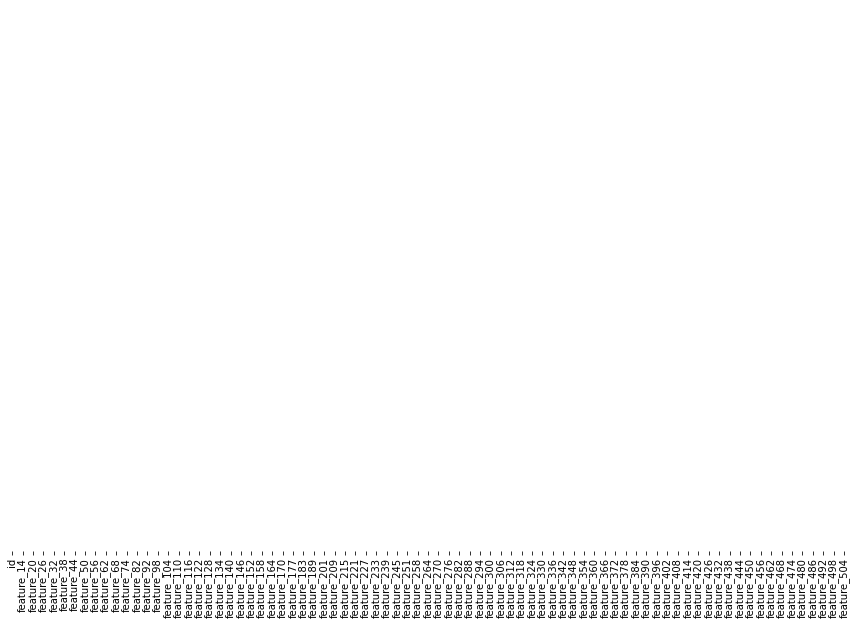

In [27]:
#heatmap for missing values in test dataset, this might take a while to execute., since we have 509 columns
plt.figure(figsize=(15,10))
sns.heatmap(testdf.isnull(), yticklabels=False, cbar=False, cmap=plt.cm.CMRmap_r)
plt.show()

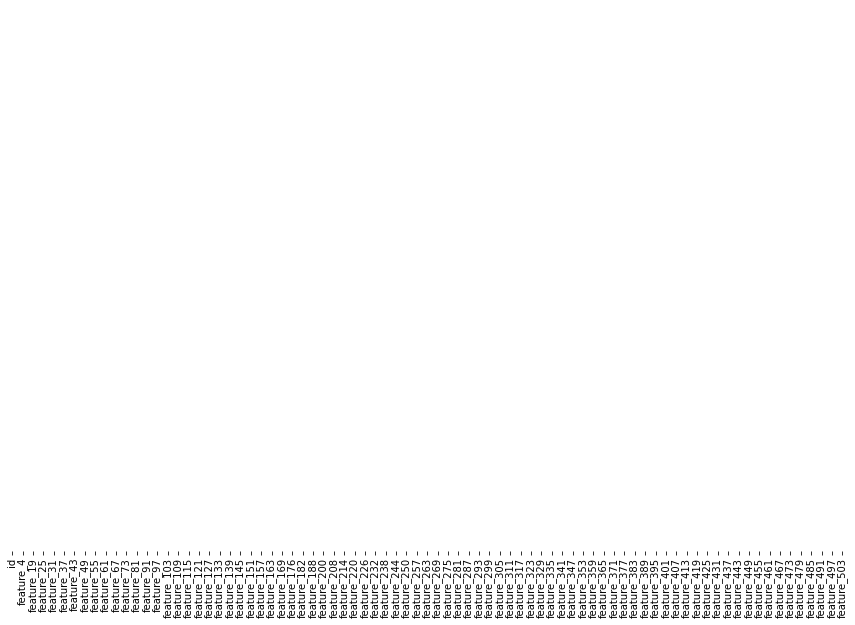

In [28]:
#heatmap for missing values in train dataset, this might take a while to execute., since we have 509 columns
plt.figure(figsize=(15,10))
sns.heatmap(traindf.isnull(), yticklabels=False, cbar=False, cmap=plt.cm.CMRmap_r)
plt.show()

In [29]:
#dropping the empyt date columns
traindf.dropna(axis=0, inplace=True)
testdf.dropna(axis=0, inplace=True)

In [30]:
#Checking for NULLS in traindf
for i in traindf.columns:
    if (traindf[i].isnull().sum())>0:
        print('{}:{}'.format(i,(100*traindf[i].isnull().sum()/len(traindf.index))))
        #train_missing_col.append(i)

In [31]:
for i in testdf.columns:
    if (testdf[i].isnull().sum())>0:
        print('{}:{}'.format(i,(100*testdf[i].isnull().sum()/len(testdf.index))))
        #train_missing_col.append(i)

Now that the nulls has been taken care off, lets move to model building

_Starting with the feature selection, we would be performing the feature selection in the following ways:_

- Dropping the variables with 0 varience.

In [32]:
traindf.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39253 entries, 1 to 69997
Data columns (total 484 columns):
 #    Column       Dtype  
---   ------       -----  
 0    id           int64  
 1    target       int64  
 2    feature_0    object 
 3    feature_1    object 
 4    feature_2    object 
 5    feature_3    object 
 6    feature_4    object 
 7    feature_14   float64
 8    feature_15   float64
 9    feature_16   object 
 10   feature_17   object 
 11   feature_18   object 
 12   feature_19   object 
 13   feature_20   object 
 14   feature_21   object 
 15   feature_22   object 
 16   feature_23   object 
 17   feature_24   object 
 18   feature_25   int64  
 19   feature_26   int64  
 20   feature_27   object 
 21   feature_28   object 
 22   feature_29   object 
 23   feature_30   object 
 24   feature_31   object 
 25   feature_32   object 
 26   feature_33   object 
 27   feature_34   object 
 28   feature_35   float64
 29   feature_36   float64
 30   feature_37   float64

In [33]:
# var_thres = VarianceThreshold(threshold=0.0)
# var_thres.fit(traindf)
# cols_list = [c for c in traindf.columns if c not in traindf.columns[var_thres.get_support()]]
# cols_list

### EDA

In [34]:
traindf.head()

,id,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_199,feature_200,feature_201,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,feature_342,feature_343,feature_344,feature_345,feature_346,feature_347,feature_348,feature_349,feature_350,feature_351,feature_352,feature_353,feature_354,feature_355,feature_356,feature_357,feature_358,feature_359,feature_360,feature_361,feature_362,feature_363,feature_364

In [35]:
#chekcing how many columns are categorical
cat_feaures = traindf.select_dtypes(include='object')
len(cat_feaures.columns)

88

We have 88 columns as categorical, lets do an EDA to check the columns

In [36]:
cat_feaures.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_41', 'feature_42', 'feature_54',
       'feature_55', 'feature_58', 'feature_97', 'feature_133', 'feature_134',
       'feature_135', 'feature_152', 'feature_163', 'feature_164',
       'feature_165', 'feature_185', 'feature_186', 'feature_187',
       'feature_188', 'feature_189', 'feature_190', 'feature_191',
       'feature_192', 'feature_199', 'feature_200', 'feature_201',
       'feature_204', 'feature_205', 'feature_239', 'feature_240',
       'feature_241', 'feature_242', 'feature_243', 'feature_244',
       'feature_246', 'feature_247', 'feature_248', 'feature_249',
       'feature_250', 'feature_251', 'feature_270', 'feature_271',
     

In [37]:
def univariate(df, feature):
    ax = sns.countplot(x=feature, data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+ (p.get_width()/2),
               y = height+50,
               s=height,
               ha='center')

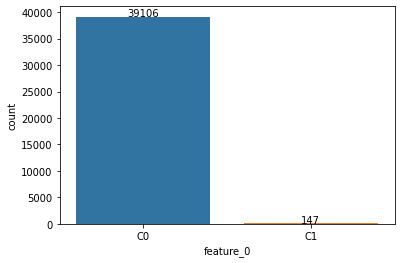

In [38]:
univariate(traindf,'feature_0')

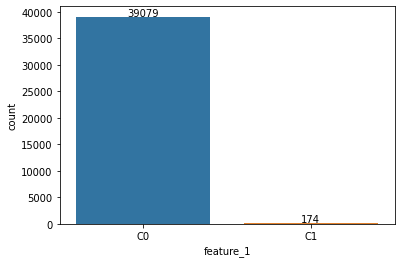

In [39]:
univariate(traindf,'feature_1') 

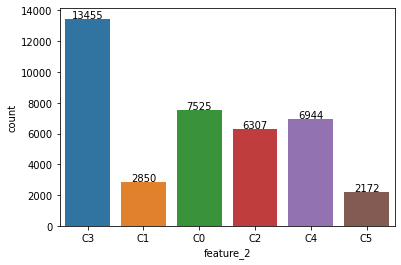

In [40]:
univariate(traindf,'feature_2') 

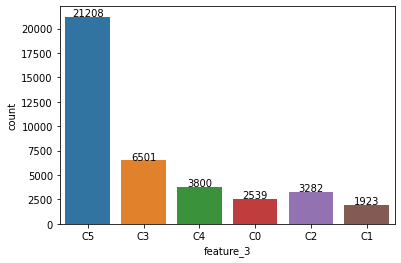

In [41]:
univariate(traindf,'feature_3') 

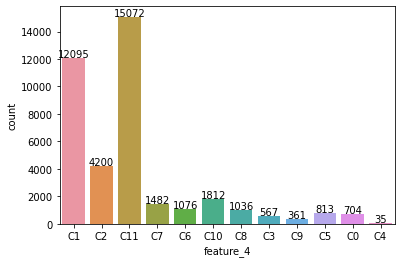

In [42]:
univariate(traindf,'feature_4')

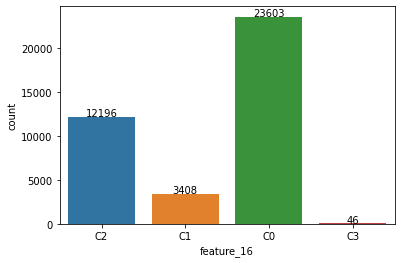

In [43]:
univariate(traindf,'feature_16') 

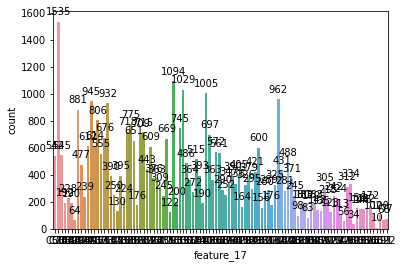

In [44]:
univariate(traindf,'feature_17') 

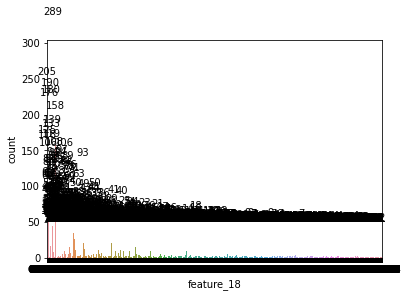

In [45]:
univariate(traindf,'feature_18') 

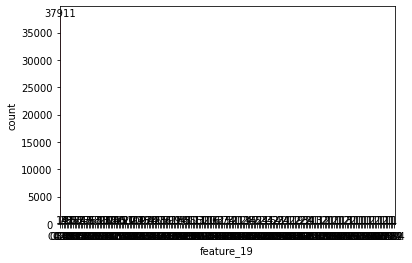

In [46]:
univariate(traindf,'feature_19') 

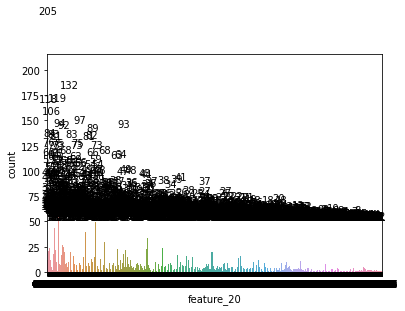

In [47]:
univariate(traindf,'feature_20')

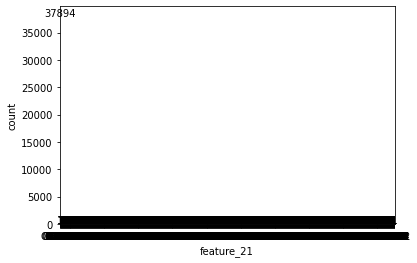

In [48]:
univariate(traindf,'feature_21') 

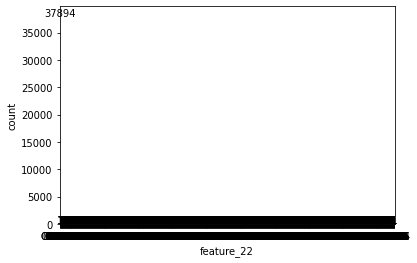

In [49]:
univariate(traindf,'feature_22') 

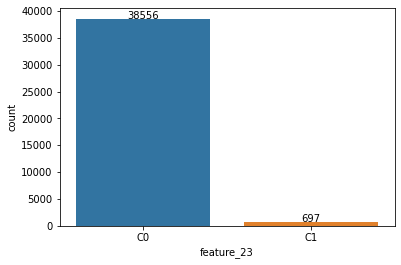

In [50]:
univariate(traindf,'feature_23') 

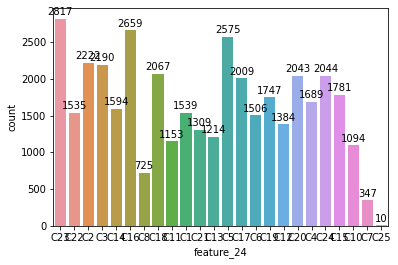

In [51]:
univariate(traindf,'feature_24') 

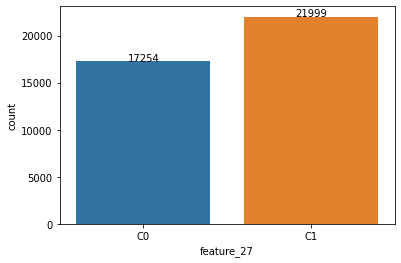

In [52]:
univariate(traindf,'feature_27')

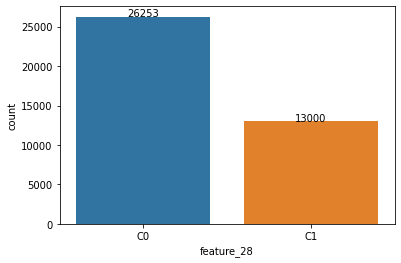

In [53]:
univariate(traindf,'feature_28') 

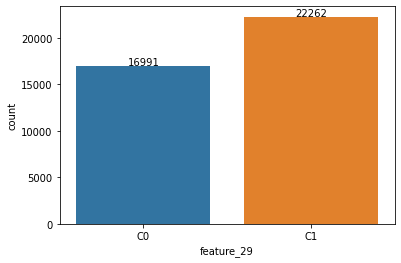

In [54]:
univariate(traindf,'feature_29') 

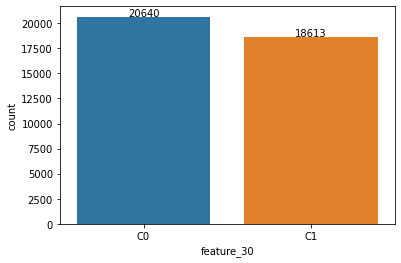

In [55]:
univariate(traindf,'feature_30') 

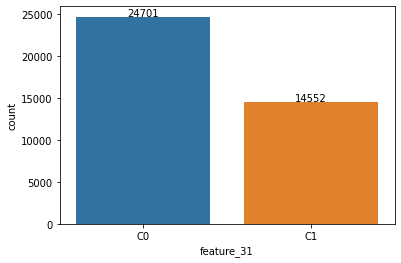

In [56]:
univariate(traindf,'feature_31') 

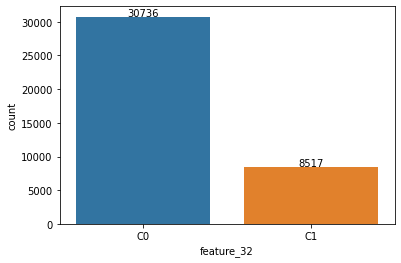

In [57]:
univariate(traindf,'feature_32')

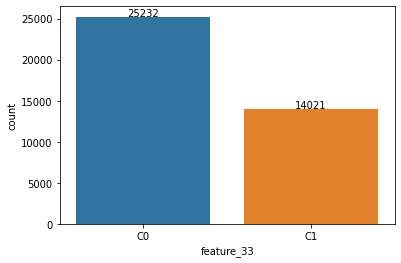

In [58]:
univariate(traindf,'feature_33') 

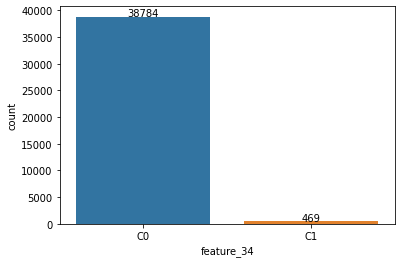

In [59]:
univariate(traindf,'feature_34') 

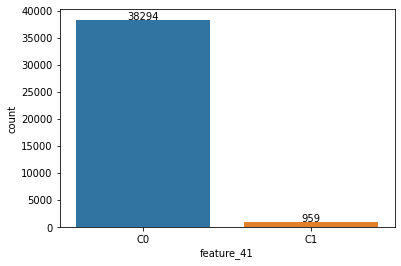

In [60]:
univariate(traindf,'feature_41') 

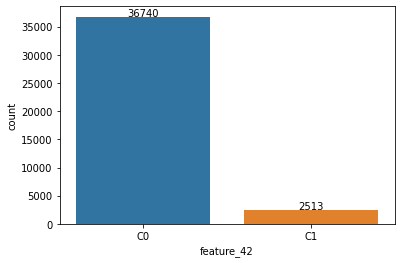

In [61]:
univariate(traindf,'feature_42') 

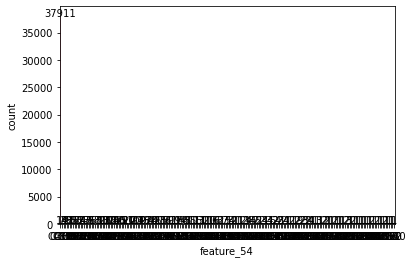

In [62]:
univariate(traindf,'feature_54')

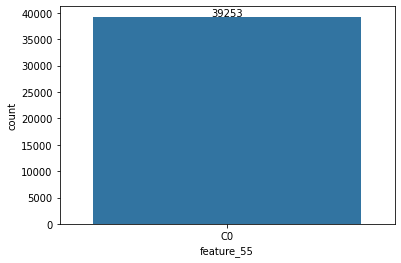

In [63]:
univariate(traindf,'feature_55') 

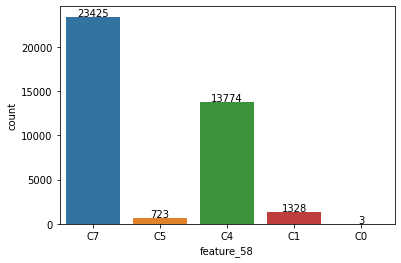

In [64]:
univariate(traindf,'feature_58') 

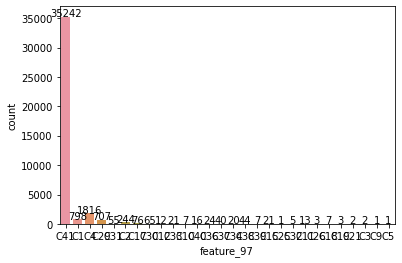

In [65]:
univariate(traindf,'feature_97') 

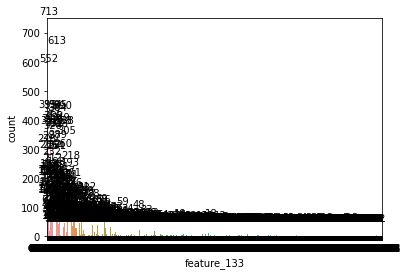

In [66]:
univariate(traindf,'feature_133') 

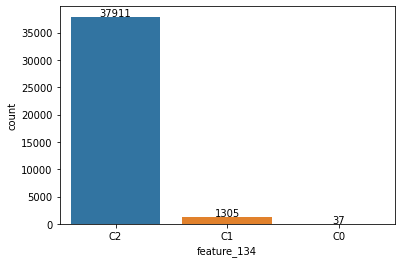

In [67]:
univariate(traindf,'feature_134')

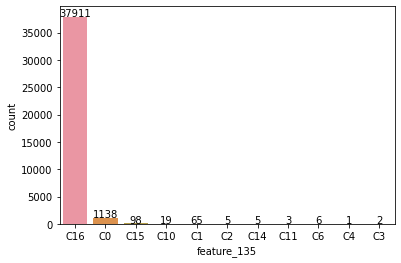

In [68]:
univariate(traindf,'feature_135') 

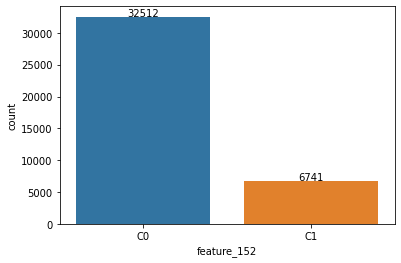

In [69]:
univariate(traindf,'feature_152') 

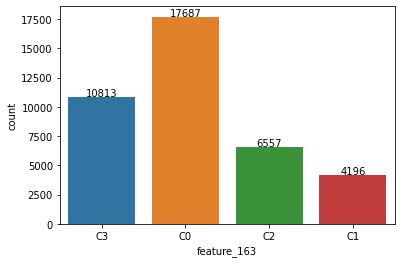

In [70]:
univariate(traindf,'feature_163') 

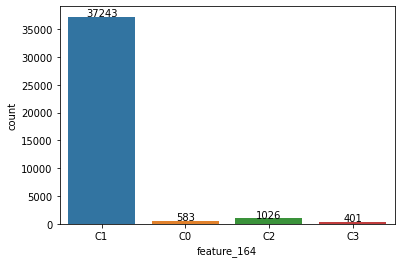

In [71]:
univariate(traindf,'feature_164')

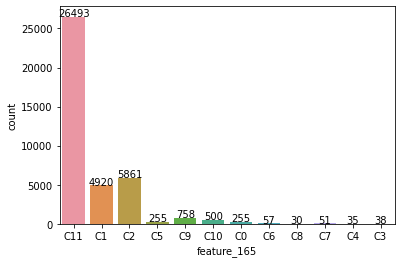

In [72]:
univariate(traindf,'feature_165') 

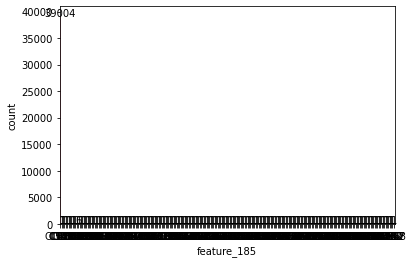

In [73]:
univariate(traindf,'feature_185') 

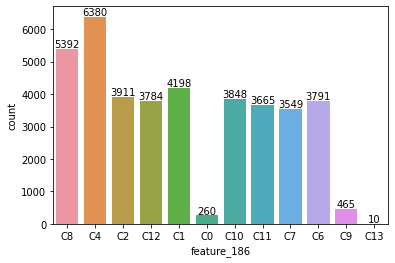

In [74]:
univariate(traindf,'feature_186') 

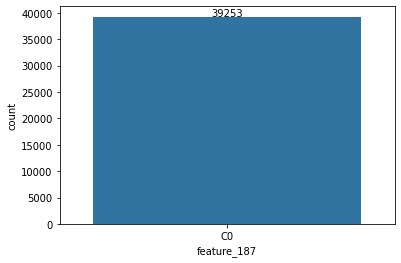

In [75]:
univariate(traindf,'feature_187')

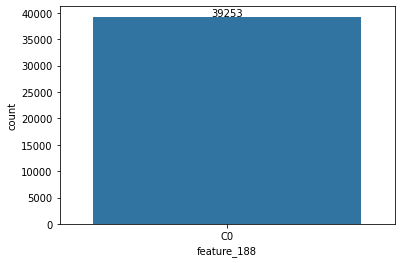

In [76]:
univariate(traindf,'feature_188') 

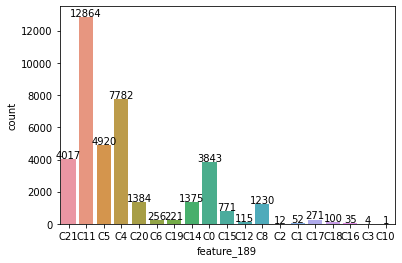

In [77]:
univariate(traindf,'feature_189') 

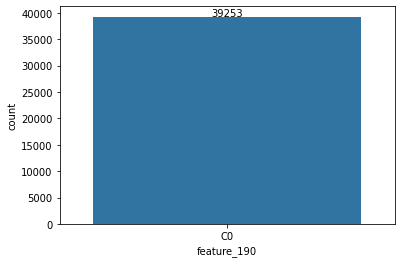

In [78]:
univariate(traindf,'feature_190') 

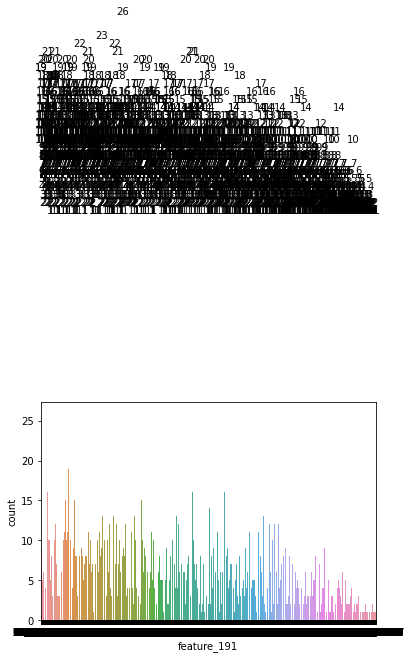

In [79]:
univariate(traindf,'feature_191')

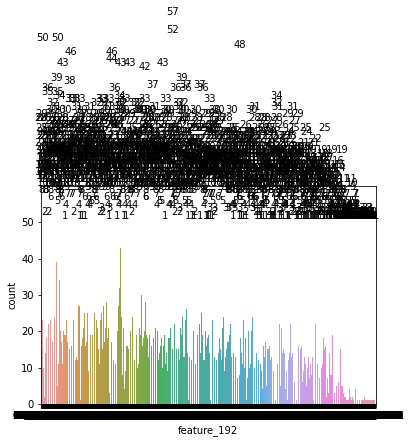

In [80]:
univariate(traindf,'feature_192') 

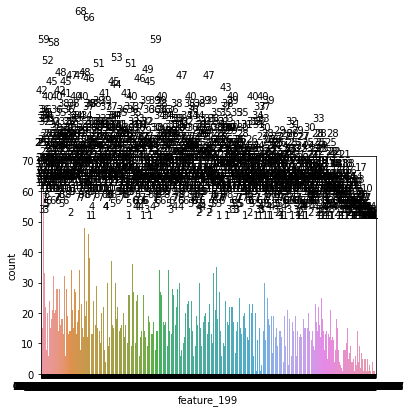

In [81]:
univariate(traindf,'feature_199') 

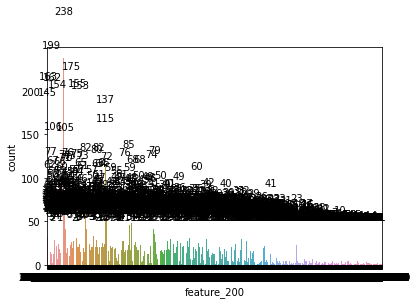

In [82]:
univariate(traindf,'feature_200') 

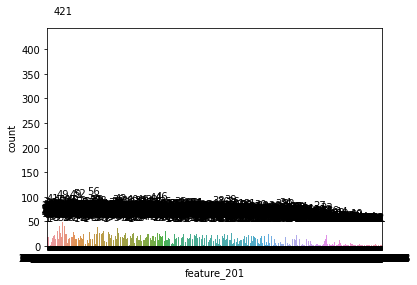

In [83]:
univariate(traindf,'feature_201')

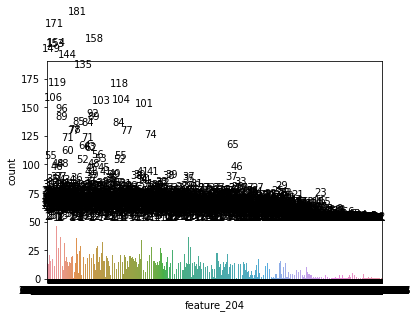

In [84]:
univariate(traindf,'feature_204') 

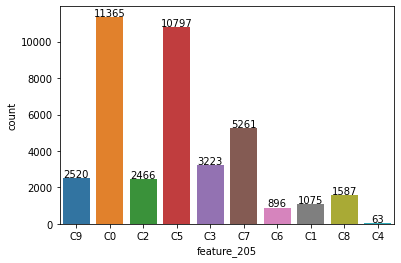

In [85]:
univariate(traindf,'feature_205') 

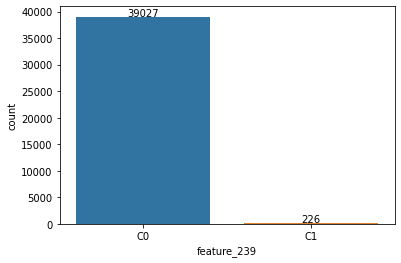

In [86]:
univariate(traindf,'feature_239') 

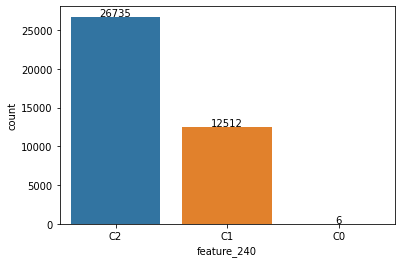

In [87]:
univariate(traindf,'feature_240')

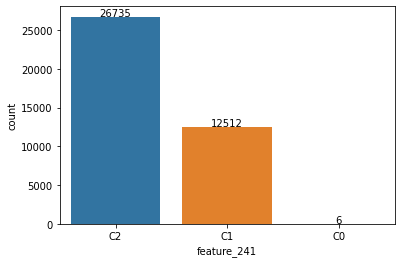

In [88]:
univariate(traindf,'feature_241') 

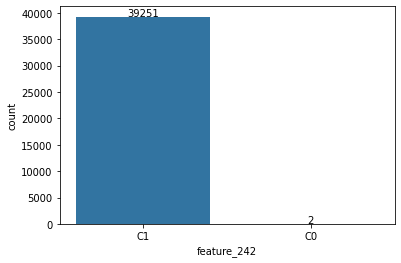

In [89]:
univariate(traindf,'feature_242') 

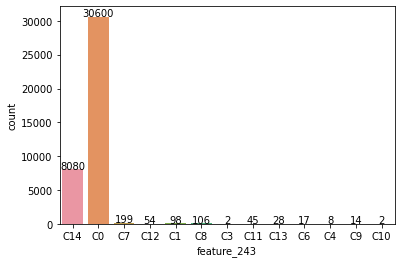

In [90]:
univariate(traindf,'feature_243') 

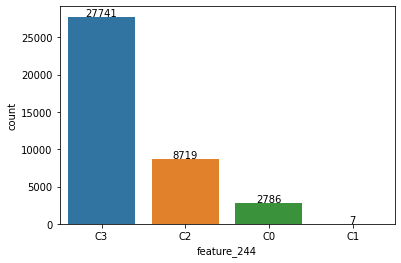

In [91]:
univariate(traindf,'feature_244')

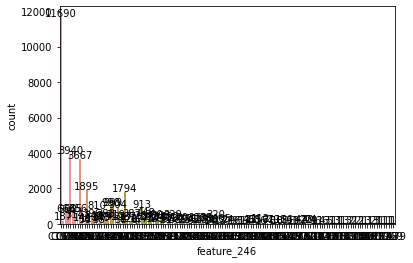

In [92]:
univariate(traindf,'feature_246') 

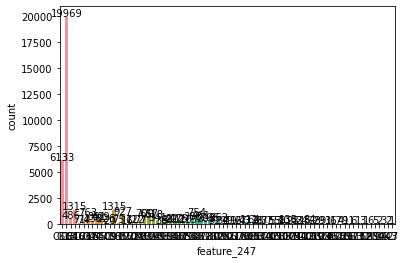

In [93]:
univariate(traindf,'feature_247') 

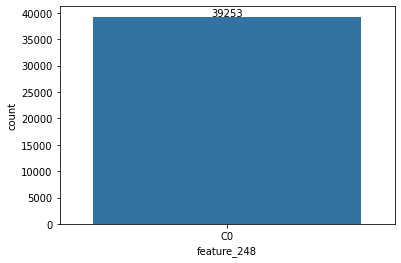

In [94]:
univariate(traindf,'feature_248') 

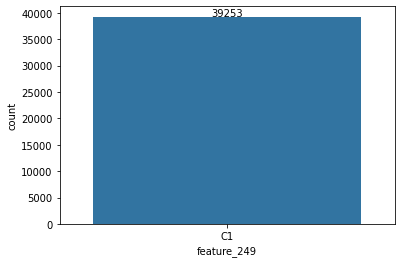

In [95]:
univariate(traindf,'feature_249')

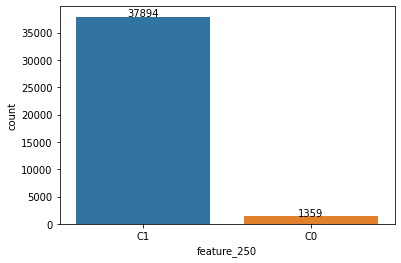

In [96]:
univariate(traindf,'feature_250') 

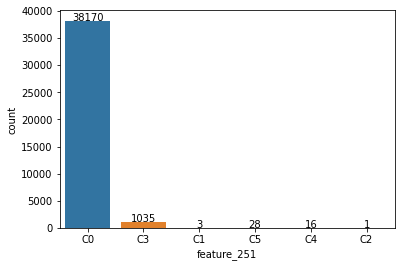

In [97]:
univariate(traindf,'feature_251') 

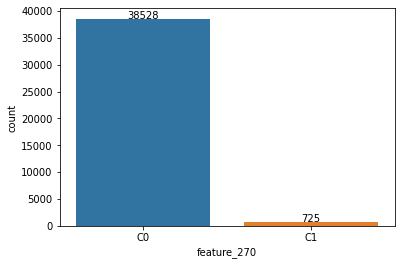

In [98]:
univariate(traindf,'feature_270') 

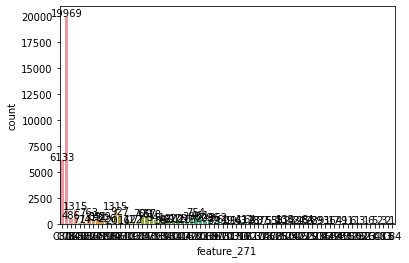

In [99]:
univariate(traindf,'feature_271')

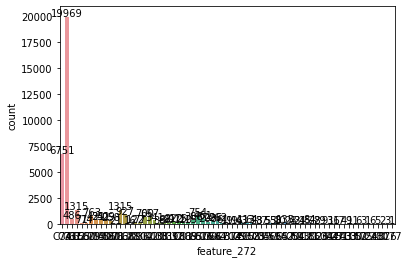

In [100]:
univariate(traindf,'feature_272') 

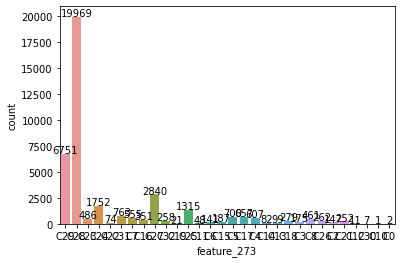

In [101]:
univariate(traindf,'feature_273') 

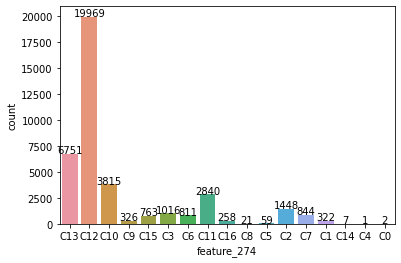

In [102]:
univariate(traindf,'feature_274') 

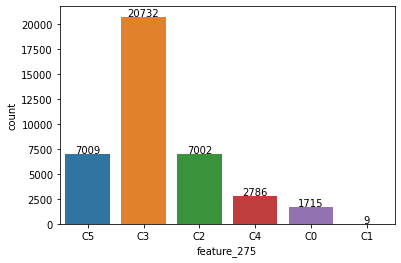

In [103]:
univariate(traindf,'feature_275')

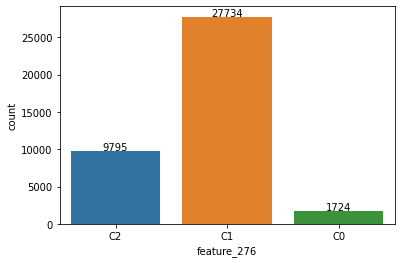

In [104]:
univariate(traindf,'feature_276') 

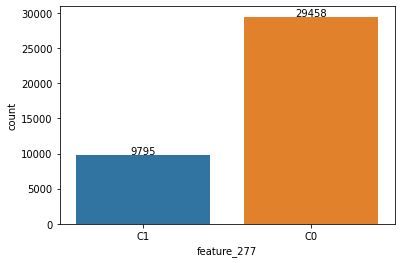

In [105]:
univariate(traindf,'feature_277') 

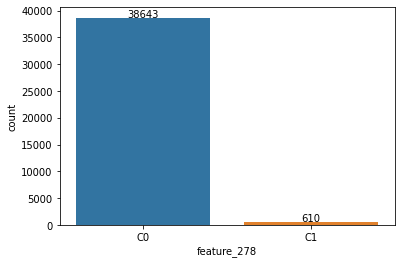

In [106]:
univariate(traindf,'feature_278') 

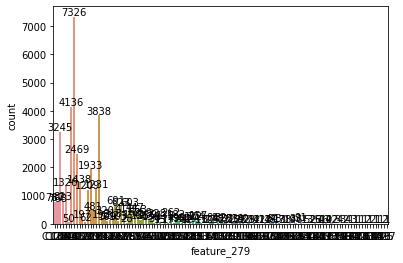

In [107]:
univariate(traindf,'feature_279')

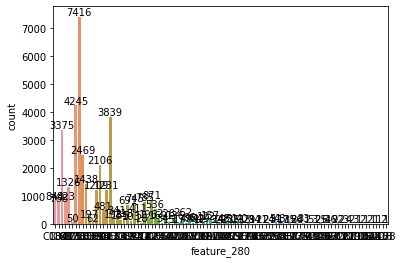

In [108]:
univariate(traindf,'feature_280') 

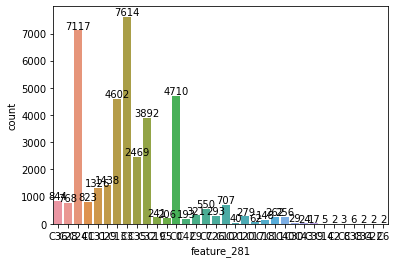

In [109]:
univariate(traindf,'feature_281') 

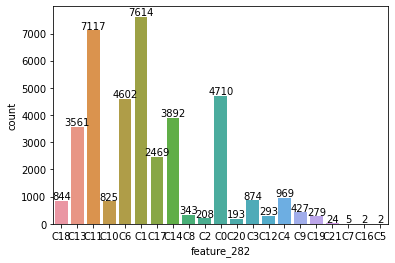

In [110]:
univariate(traindf,'feature_282') 

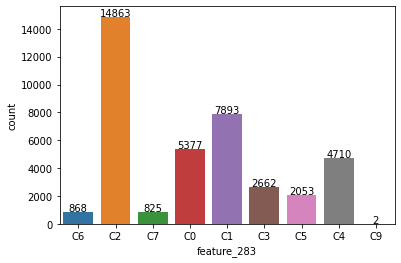

In [111]:
univariate(traindf,'feature_283')

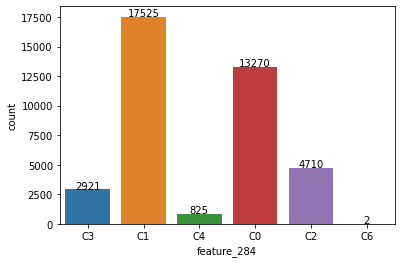

In [112]:
univariate(traindf,'feature_284') 

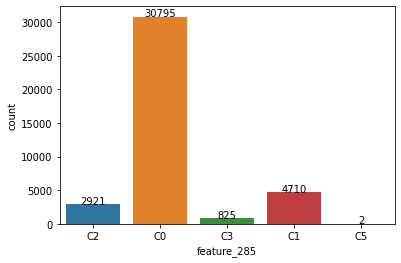

In [113]:
univariate(traindf,'feature_285') 

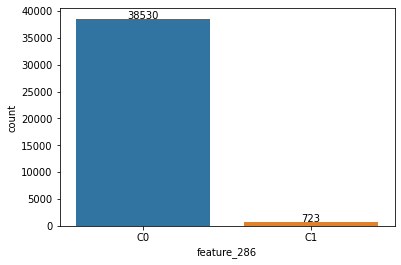

In [114]:
univariate(traindf,'feature_286') 

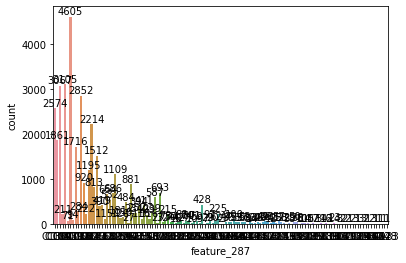

In [115]:
univariate(traindf,'feature_287')

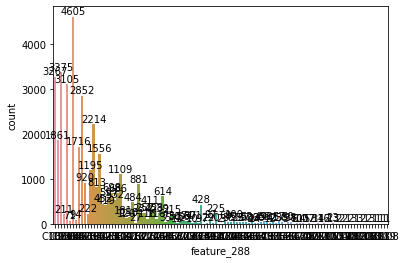

In [116]:
univariate(traindf,'feature_288') 

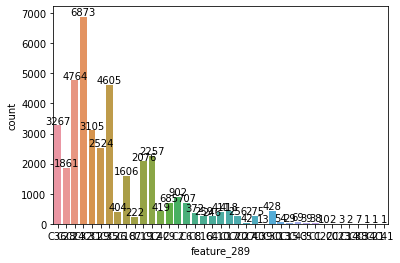

In [117]:
univariate(traindf,'feature_289') 

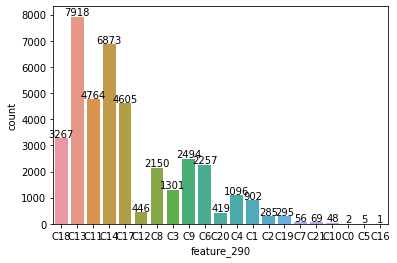

In [118]:
univariate(traindf,'feature_290') 

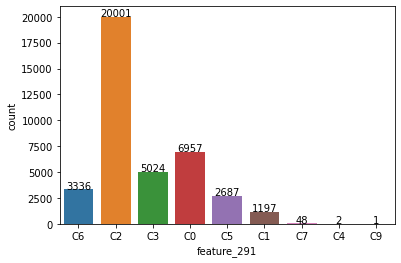

In [119]:
univariate(traindf,'feature_291')

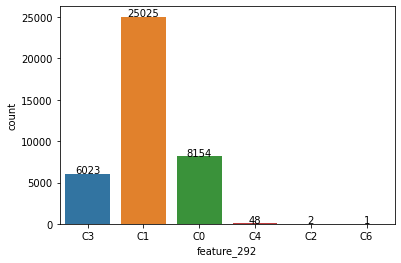

In [120]:
univariate(traindf,'feature_292') 

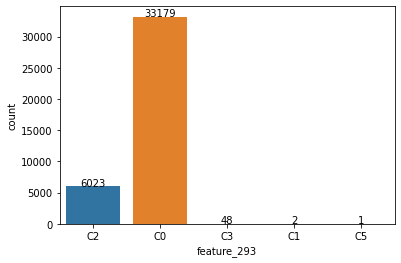

In [121]:
univariate(traindf,'feature_293') 

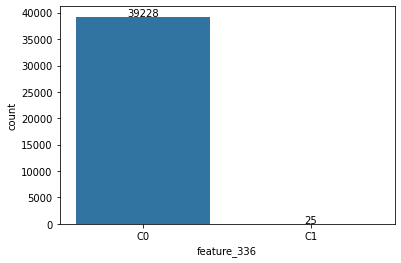

In [122]:
univariate(traindf,'feature_336') 

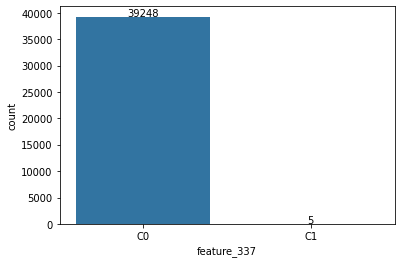

In [123]:
univariate(traindf,'feature_337')

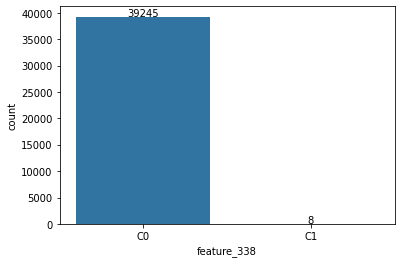

In [124]:
univariate(traindf,'feature_338') 

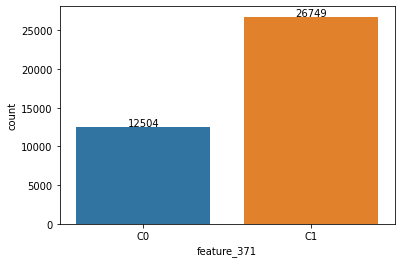

In [125]:
univariate(traindf,'feature_371')

out of 88 feature 13 features are a bit intresting, digging a bit more on these

In [126]:
traindf['feature_18'].value_counts()

C9235     289
C23471    205
C1558     190
C13032    180
C23472    176
         ... 
C12208      1
C14154      1
C11380      1
C8650       1
C22264      1
Name: feature_18, Length: 12454, dtype: int64